# Philharmonia basics

In [18]:
import sys
sys.path.append('..')

In [19]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

In [20]:
import IPython.display as display
import librosa
import matplotlib.pyplot as plot
import numpy as np

from philharmonia import dataframe, datafile

## Load data

In [21]:
data = dataframe()

data.head()

,file,filename,filesize,instrument,percussion,note,octave,pitch,length,dynamic,style
0,cello/cello_F2_phrase_mezzo-forte_arco-detache...,cello_F2_phrase_mezzo-forte_arco-detache,186722,cello,False,F,2.0,87.31,phrase,mezzo-forte,arco-detache
1,cello/cello_As2_05_forte_arco-normal.mp3,cello_As2_05_forte_arco-normal,12119,cello,False,A#,2.0,116.54,05,forte,arco-normal
2,cello/cello_F5_15_fortissimo_arco-normal.mp3,cello_F5_15_fortissimo_arco-normal,23091,cello,False,F,5.0,698.46,15,fortissimo,arco-normal
3,cello/cello_D5_025_pianissimo_arco-normal.mp3,cello_D5_025_pianissimo_arco-normal,7732,cello,False,D,5.0,587.33,025,pianissimo,arco-normal
4,cello/cello_C3_1_fortissimo_arco-normal.mp3,cello_C3_1_fortissimo_arco-normal,17762,cello,False,C,3.0,130.81,1,fortissimo,arco-normal


## Plot sound sample

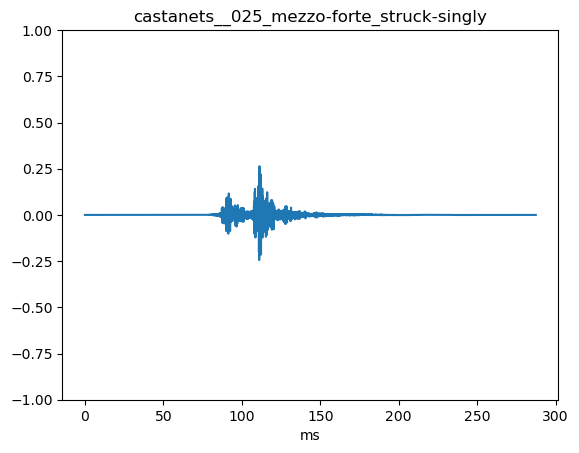

In [22]:
samples = data[(data.percussion == True) & (data.filesize > 1024)]
sample = samples[samples.filesize == samples.filesize.min()].iloc[0]

x, sr = librosa.load(datafile(sample.file), sr=None, mono=True)
t = librosa.samples_to_time(range(x.size), sr=sr) * 1e3

plot.title(sample.filename)
plot.plot(t, x);
plot.xlabel('ms');
plot.ylim(-1, +1);

display.Audio(x, rate=sr)

## Query instruments

In [23]:
lengths = data \
    .filter(['instrument', 'length']) \
    .groupby(['instrument', 'length'])['length'] \
    .count() \
    .unstack(level=1) \
    .fillna(0) \
    .astype(int) \
    .reset_index()

data.filter(['percussion', 'instrument']) \
    .groupby(['percussion', 'instrument']) \
    .agg(samples=('instrument', len)) \
    .rename(columns={'samples': 'total samples'}) \
    .sort_values(['percussion', 'instrument']) \
    .reset_index() \
    .merge(lengths, on='instrument')

,percussion,instrument,total samples,025,05,1,15,long,phrase,very-long
0,False,banjo,74,0,0,0,0,0,0,74
1,False,bass-clarinet,944,224,210,208,213,0,73,16
2,False,bassoon,720,172,195,169,91,20,55,18
3,False,cello,889,213,175,251,181,5,64,0
4,False,clarinet,846,187,187,187,186,27,53,19
5,False,contrabassoon,710,146,145,165,158,32,48,16
6,False,double-bass,852,210,200,224,143,1,74,0
7,False,english-horn,691,164,166,162,144,0,49,6
8,False,flute,878,189,188,188,175,48,70,20
9,False,french-horn,652,121,121,135,118,51,65,41
